## Observations and Insights 

#### From Drug Regimen Summary Statistics and Box Plot, Capomulin and Ramicane had the more significant performance comparing to other regimens and they were also the most successful drugs in reducing the size of the tumors within the number of mice subjects. 

#### In the line chart, the tumor volume of mouse s185 which was treated with Capomulin considerably decreases along time (Timepoint) goes by which shows the treatment is working. From the results, we  can conclude mice with Capomulin treatment has significant performance as mentioned

#### The correlation coefficient between mouse weight and tumor volume is 0.84 which the relationship can be classified as a strong and positive correlation. In addition, in the linear regression graph, we can conclude if mice weight increase, tumor volume increases as well.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table
import matplotlib as mpl

# Which version of MPL are we using?
print("Matplotlib version: ",mpl.__version__)

# Because I am using Jupyter Notebook Dark Mode... This will allow creating dark background on figures
plt.style.use('dark_background')

# Also because 'dark_background' does shos pure blacks and my theme is in some 'grey' environment I do
# adapt it a bit

mpl.rcParams["figure.facecolor"] = '1c2021'
mpl.rcParams["axes.facecolor"] = '1c2021'

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combined_df

Matplotlib version:  3.5.3


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Display unique mice number 
mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
c = combined_df.set_index("Mouse ID").loc["g989"]
c


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [68]:
# Remove duplicated entries to obtain clean data 
cleaned_mice_df = combined_df.drop([909,911,913,915,917], axis = 0)
cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
cleaned_mice_2 = cleaned_mice_df["Sex"]
cleaned_mice_2.unique()


array(['Male', 'Female'], dtype=object)

In [70]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_1 = cleaned_mice_df["Mouse ID"].nunique()
cleaned_mice_1

249

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Drug_mean = cleaned_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean ()
Drug_median = cleaned_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median ()
Drug_variance = cleaned_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var ()
Drug_standard_deviation = cleaned_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Drug_sem = cleaned_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem ()

# Assemble the resulting series into a single summary dataframe.
Summary_stat = {
                "Mean": Drug_mean, 
                 "Median": Drug_median,
                 "Variance": Drug_variance,
                 "Standard Deviation": Drug_standard_deviation,
                 "SEM": Drug_sem
                }

Summary_stat_df = pd.DataFrame(Summary_stat)

Summary_stat_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Agg_drug = cleaned_mice_df.groupby(["Drug Regimen"])

Summary_stat_1 = Agg_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

Summary_stat_1


C:\Users\tonyn\AppData\Local\Temp\ipykernel_23708\3712669948.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Summary_stat_1 = Agg_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

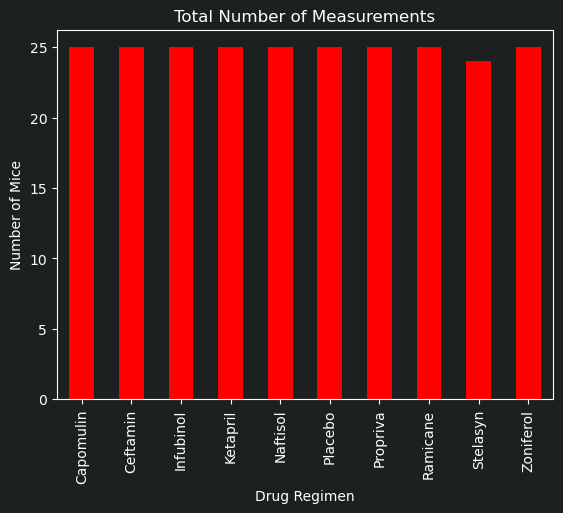

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_reg_total = cleaned_mice_df.groupby(["Drug Regimen"]).nunique()["Mouse ID"] 

pandas_plot = drug_reg_total.plot.bar(color='r')
pandas_plot

plt.title("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
drug_reg_total

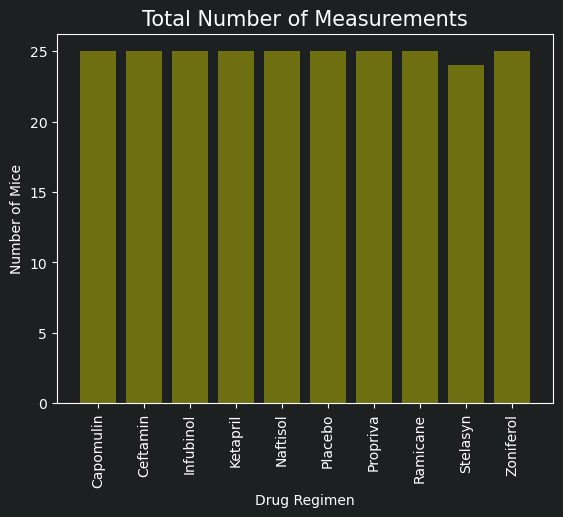

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Define x-axis 
x_axis = np.arange(len(cleaned_mice_df.groupby(["Drug Regimen"])))

# Define x-axis 
y_axis = cleaned_mice_df.groupby(["Drug Regimen"]).nunique()["Mouse ID"]


plt.bar(x_axis, y_axis, color='y', alpha=0.5, align="center")

# Define tickers 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],rotation=90);

plt.title("Total Number of Measurements",fontsize = 15);
plt.xlabel("Drug Regimen",fontsize = 10);
plt.ylabel("Number of Mice",fontsize = 10);
plt.show()


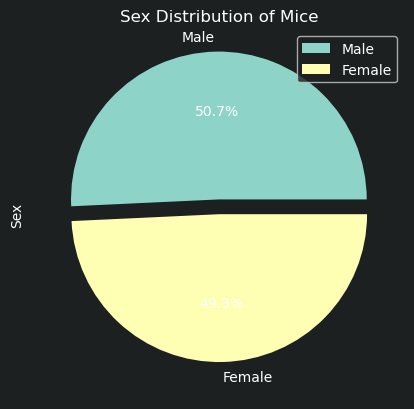

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Pie_title = "Sex Distribution of Mice"

mice_sex_group = cleaned_mice_df["Sex"].value_counts()

explode = (0.1, 0)

mice_sex_group_1 = mice_sex_group.to_frame()

gender_pie = mice_sex_group_1.plot(kind = "pie", y = 'Sex', autopct="%1.1f%%", explode = (0.1, 0), title = Pie_title)


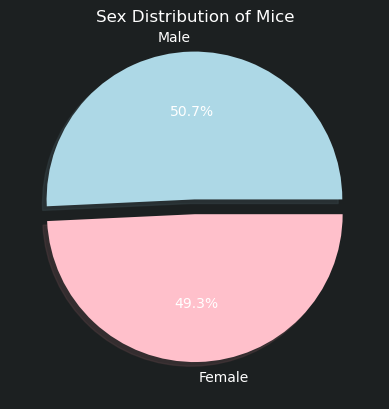

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]

colors = ["lightblue", "pink"]

explode = (0.1, 0)

plt.pie(mice_sex_group, labels = labels, explode=explode, autopct = "%1.1f%%", colors = colors, shadow = True, startangle = 0);

plt.title(Pie_title);

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Ramicane"]
Infubinol_df = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Infubinol"]
Ceftamin_df = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Ceftamin"]

In [78]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_max = Capomulin_df.groupby("Mouse ID").max()["Timepoint"].to_frame()
Ramicane_max = Ramicane_df.groupby("Mouse ID").max()["Timepoint"].to_frame()
Infubinol_max = Infubinol_df.groupby("Mouse ID").max()["Timepoint"].to_frame()
Ceftamin_max = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"].to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_max, cleaned_mice_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_max, cleaned_mice_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_max, cleaned_mice_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_max, cleaned_mice_df, on=("Mouse ID","Timepoint"),how="left")


### Capomulin Quartiles, Outliers

In [79]:
Capomulin_tumor = Capomulin_merge ["Tumor Volume (mm3)"]

quartiles = Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


### Ramicane Quartiles, Outliers

In [80]:
Ramicane_tumor = Ramicane_merge ["Tumor Volume (mm3)"]

quartiles = Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


### Infubinol Quartiles, Outliers

In [81]:
Infubinol_tumor = Infubinol_merge ["Tumor Volume (mm3)"]

quartiles = Infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


### Ceftamin Quartiles, Outliers

In [82]:
Ceftamin_tumor = Ceftamin_merge ["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


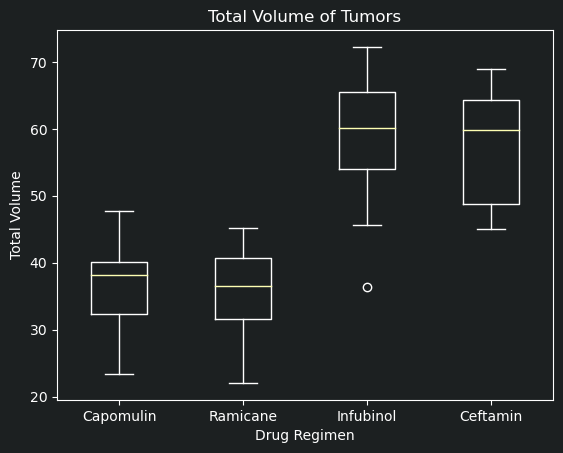

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Locate the final tumor volume for the four regimens

treatment = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
fig1, ax1 = plt.subplots()
ax1.set_title("Total Volume of Tumors")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Total Volume")
ax1.boxplot(treatment, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [84]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Selecting mouse s185 as our target
mouse_with_Capomulin = Capomulin_df.loc [Capomulin_df["Mouse ID"] == "s185"]

# Removing unnecessary data 
mouse_data = mouse_with_Capomulin.drop(columns=["Sex", "Age_months", "Weight (g)", "Metastatic Sites"])
mouse_data

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


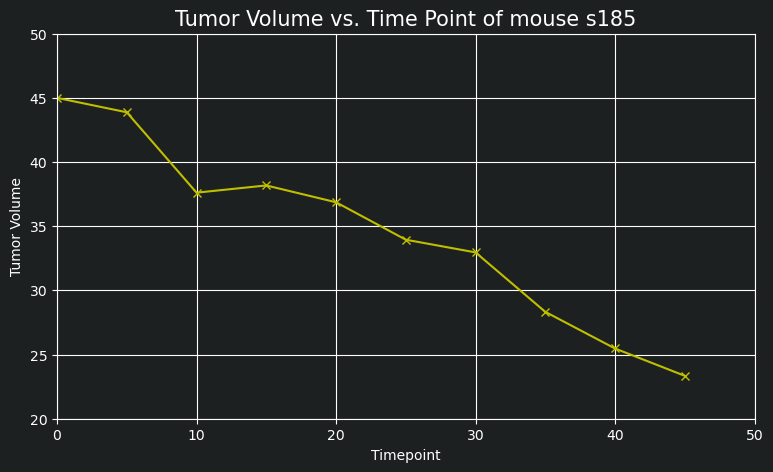

In [85]:
#Use the mouse ID to plot the line chart
x_axis = mouse_data["Timepoint"]
y_axis = mouse_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(9, 5))
plt.plot(x_axis, y_axis, marker ='x', color='y')
plt.title("Tumor Volume vs. Time Point of mouse s185", fontsize = 15)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.grid()
plt.xlim(0,50)
plt.ylim(20,50)
plt.show()

In [86]:
Capomulin_df
mouse_data_2 = Capomulin_df.drop(columns=["Sex", "Age_months", "Timepoint", "Metastatic Sites"])
mouse_data_2


,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3)
10,s185,Capomulin,17,45.000000
11,s185,Capomulin,17,43.878496
12,s185,Capomulin,17,37.614948
13,s185,Capomulin,17,38.177232
14,s185,Capomulin,17,36.866876
...,...,...,...,...
440,i557,Capomulin,24,47.685963
1452,r157,Capomulin,25,45.000000
1453,r157,Capomulin,25,45.597064
1454,r157,Capomulin,25,46.059608


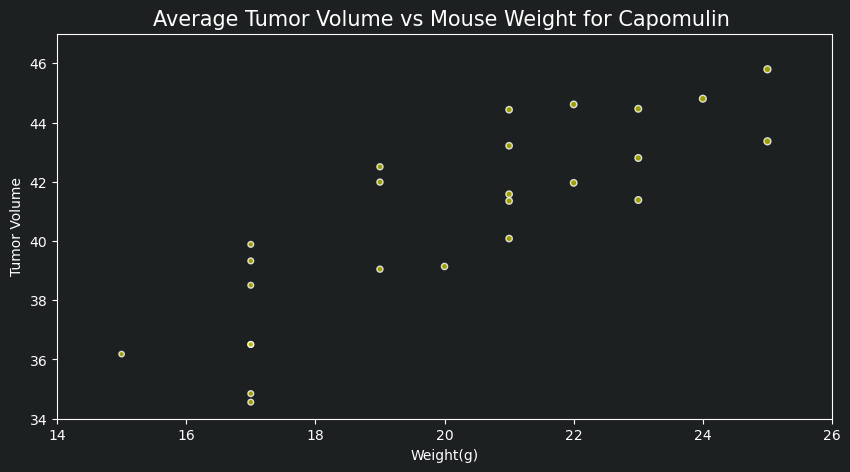

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_avg = mouse_data_2.groupby(["Mouse ID"]).mean()
average_weight = Capomulin_avg["Weight (g)"]
average_volume = Capomulin_avg["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(average_weight, average_volume, marker="o", facecolors="y", edgecolors="white",
            s=average_weight, alpha=0.8)
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin ',fontsize = 15)
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume")
plt.xlim(14,26)
plt.ylim(34,47)
plt.show()


## Correlation and Regression

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_weight = Capomulin_avg["Weight (g)"]
average_volume = Capomulin_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(average_weight,average_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708723


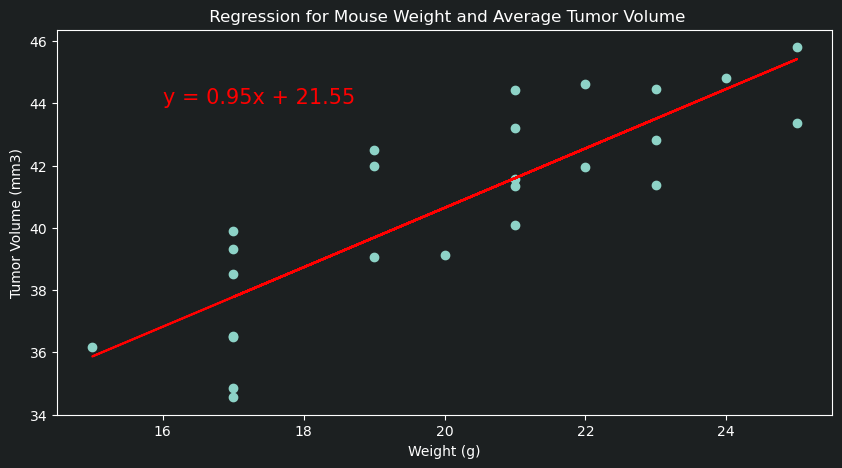

In [89]:
 # Add the linear regression equation and line to plot
x_values = average_weight
y_values = average_volume
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="r")
plt.title(' Regression for Mouse Weight and Average Tumor Volume',fontsize = 12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()